# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv 

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.001
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
-0.001
-0.003
-0.002
-0.002
0.0
-0.001
-0.002
-0.002
1.004
1.004
1.002
1.002
2.006
2.006
2.006
3.009
3.009
3.008
3.008
3.986
3.988
3.99
3.989
3.988
4.969
4.972
4.974
4.973
4.972
5.958
5.958
5.958
5.958
6.603
6.602
6.601
6.601
7.257
7.256
7.255
7.255
8.237
8.237
8.235
8.235
9.22
9.224
9.225
9.225
9.224
9.224
10.232
10.231
10.23
11.205
11.207
11.21
11.209
11.208
12.192
12.195
12.198
12.197
12.197
13.171
13.173
13.177
13.175
13.175
13.893
13.897
13.898
13.897
13.897
14.621
14.62
14.62
14.62
15.605
15.605
15.603
15.603
16.582
16.582
16.582
16.582
17.564
17.563
17.562
17.562
18.542
18.542
18.54
18.54
19.526
19.526
19.525
19.525
20.51
20.51
20.508
20.508
21.485
21.485
21.484
21.483
22.464
22.464
22.462
22.462
23.443
23.442
23.441
23.441
24.425
24.424
24.423
24.423
25.406
25.404
25.403
25.403
26.393
26.391
26.39
26.389
27.389
27.387
27.386
27.386
28.372
28.372
28.371
28.371
29.104
29.1

58.078
58.078
58.078
58.078
58.078
58.078
58.078
58.077
58.077
58.077
58.077
58.077
58.077
58.076
58.076
58.076
58.076
58.075
58.074
58.073
58.074
58.096
58.124
58.149
58.174
58.204
58.233
58.233
58.233
58.233
58.233
58.233
58.243
58.243
58.243
58.242
58.242
58.241
58.241
58.241
58.241
58.241
58.242
58.242
58.242
58.242
58.241
58.241
58.241
58.241
58.24
58.24
58.24
58.24
58.239
58.239
58.239
58.239
58.239
58.238
58.238
58.238
58.238
58.237
58.237
58.237
58.237
58.237
58.237
58.237
58.237
58.237
58.236
58.235
58.235
58.234
58.235
58.233
58.338
58.368
58.4
58.4
58.4
58.418
58.418
58.418
58.419
58.419
58.426
58.426
58.426
58.426
58.425
58.424
58.424
58.424
58.424
58.423
58.425
58.425
58.425
58.425
58.424
58.423
58.423
58.421
58.422
58.425
58.425
58.424
58.423
58.424
58.424
58.686
58.695
58.693
58.697
58.697
58.696
58.695
58.698
58.989
58.989
59.026
59.026
59.025
59.029
59.027
59.026
59.027
59.124
59.159
59.159
59.161
59.169
59.169
59.167
59.167
59.167
59.506
59.506
59.544
59.544
59.543
59

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1409,2818,60.292
1410,2820,60.292
1411,2822,60.292
1412,2824,60.292


<IPython.core.display.Javascript object>


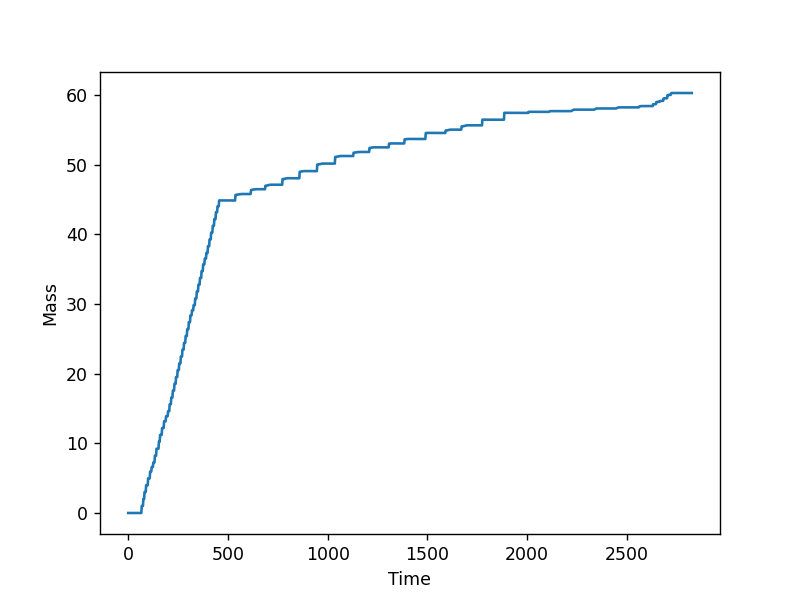

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
#mass_df.to_csv('mass_data/MassProfile_060223_S115-120.csv')